In [1]:
import scipy
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#read training data
data = pd.read_csv('train.csv')
print 'load in data train.csv'

#read test data
data_test = pd.read_csv('test.csv')

#drop unnecessary columns
#no id no loss for feature
feature_cols = list(data.columns[1:-1])
target_cols = data.columns[-1]

#print all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


#print "Feature columns:\n{}".format(feature_cols)
#print "\nTarget column: {}".format(target_cols)
#print "feature columns ({} total features):\n".format(len(feature_cols))
print(data.head())



load in data train.csv
   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13  \
0   1    A    B    A    B    A    A    A    A    B     A     B     A     A   
1   2    A    B    A    A    A    A    A    A    B     B     A     A     A   
2   5    A    B    A    A    B    A    A    A    B     B     B     B     B   
3  10    B    B    A    B    A    A    A    A    B     A     A     A     A   
4  11    A    B    A    B    A    A    A    A    B     B     A     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25  \
0     A     A     A     A     A     A     A     A     A     B     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat26 cat27 cat28 cat29 cat30 cat31 cat32 c

Explore the dataset

In [4]:
print data.describe()
'''
No attribute missing as count for id cont1 cont2....cont14 are all 188318
No negative values
Nothing displayed for catogorical data
'''

                  id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

In [3]:
print data.skew()

#closers to zero means less skew
#loss shows highest skew

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


In [2]:
#normalize loss
data["loss"] = np.log1p(data["loss"])

#study numerical features' correlation# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#number of features considered
size = 15

#get the names of all the columns
cols=data.columns 

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA


cat11 and cat12 = 0.99
cat1 and cat9 = 0.93
cat6 and cat10 = 0.88
cat6 and cat13 = 0.82
cat1 and cat10 = 0.81
cat6 and cat9 = 0.80
cat9 and cat10 = 0.79
cat6 and cat12 = 0.79
cat6 and cat11 = 0.77
cat1 and cat6 = 0.76
cat7 and cat11 = 0.75
cat7 and cat12 = 0.74
cat10 and cat12 = 0.71
cat10 and cat13 = 0.71
cat10 and cat11 = 0.70
cat6 and cat7 = 0.66
cat9 and cat13 = 0.64
cat9 and cat12 = 0.63
cat1 and cat12 = 0.61
cat9 and cat11 = 0.61
cat1 and cat11 = 0.60
cat1 and cat13 = 0.53
cat4 and cat8 = 0.53


Data Visualization
Categorical features


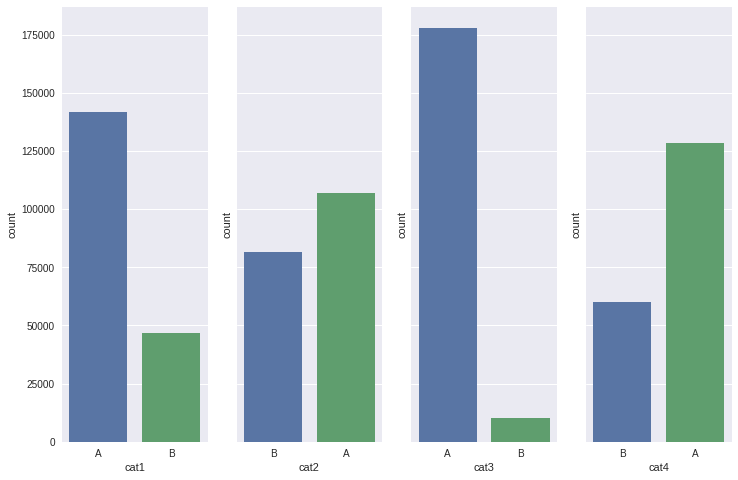

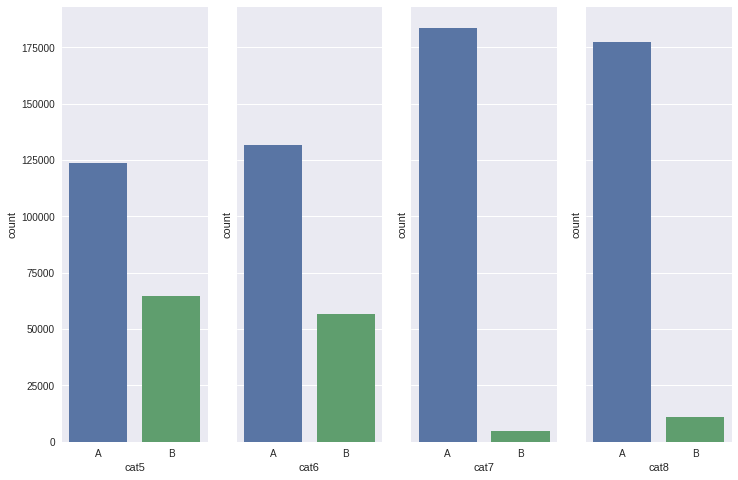

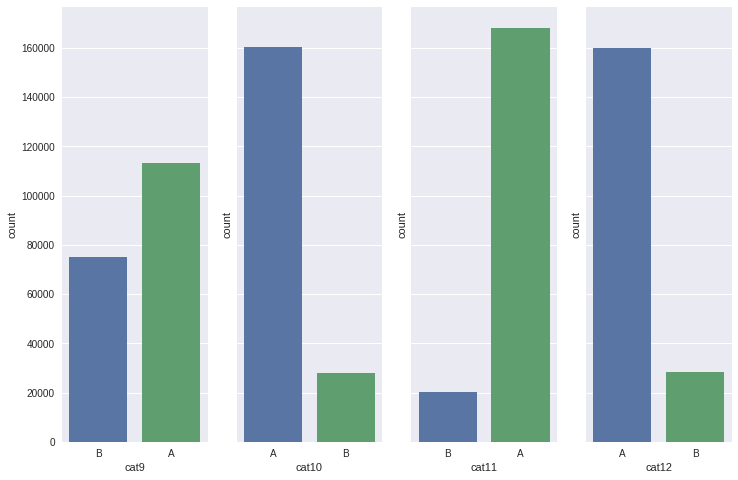

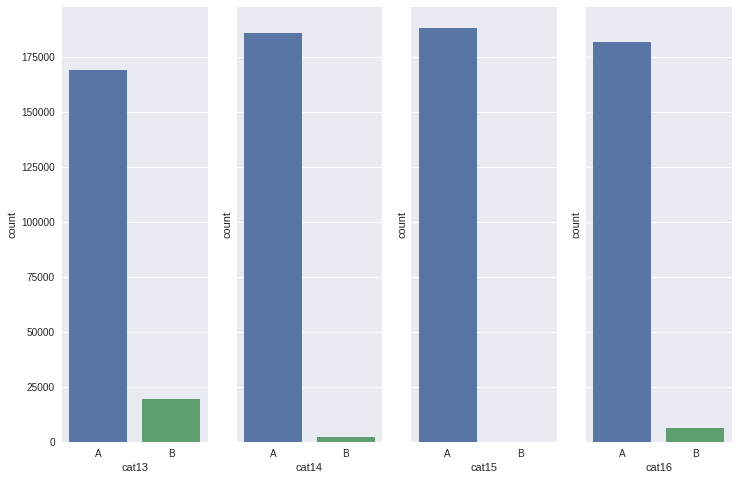

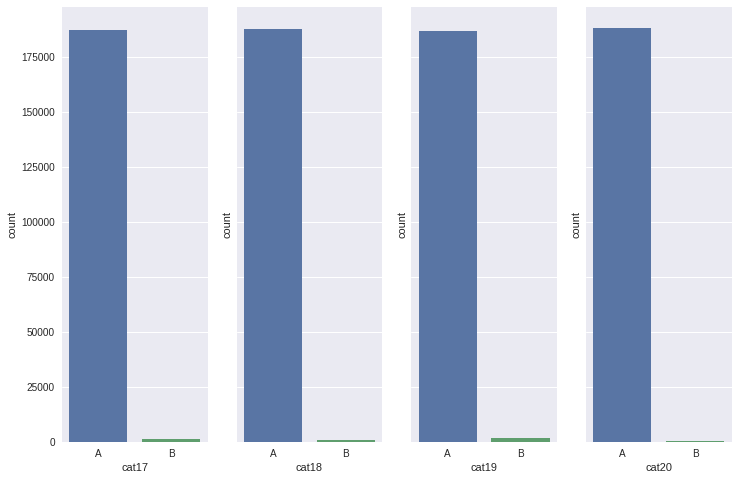

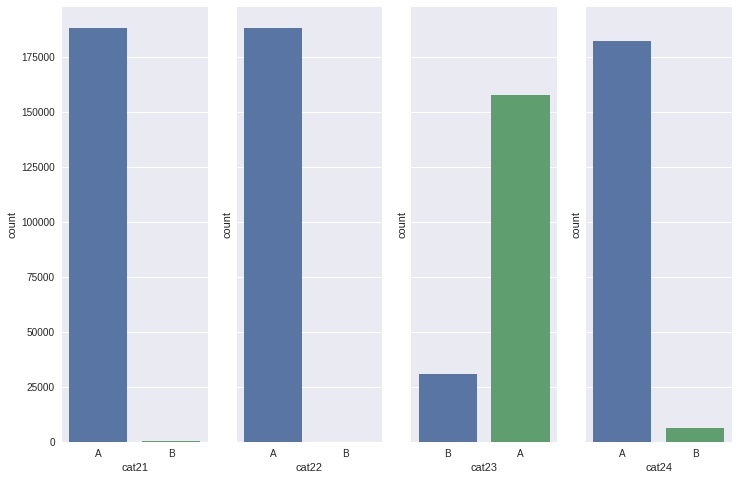

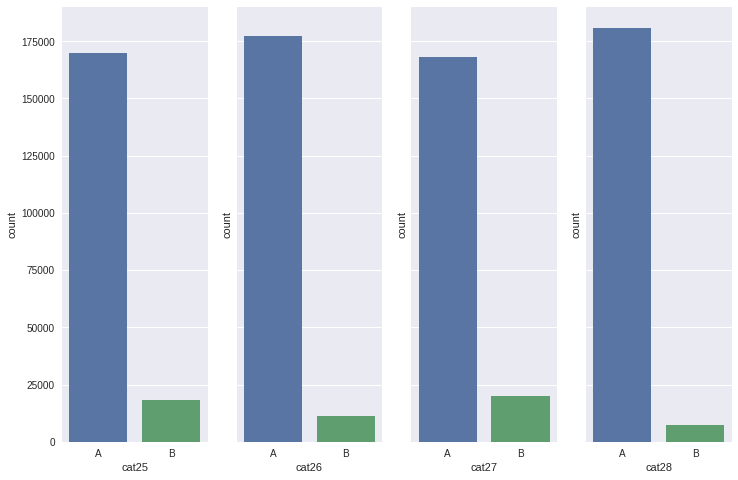

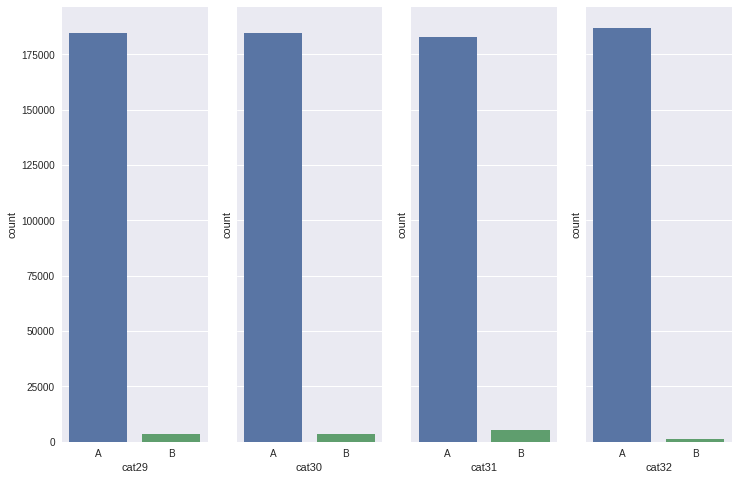

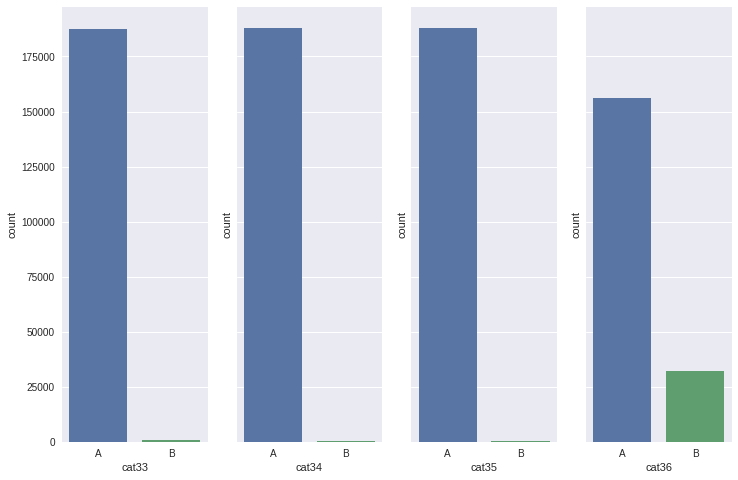

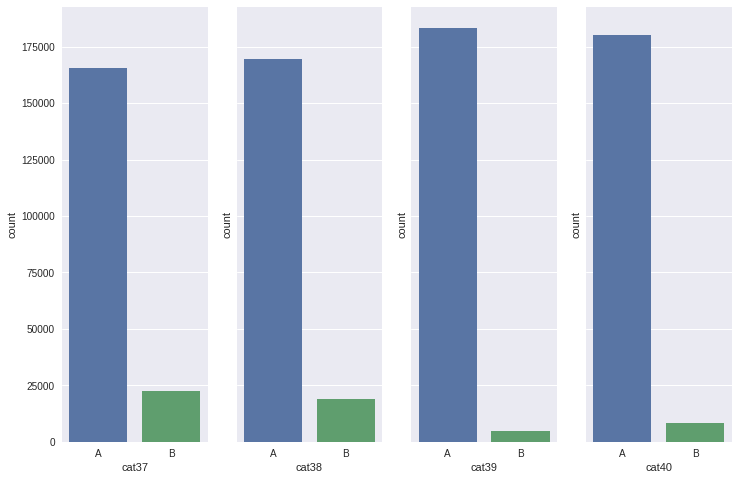

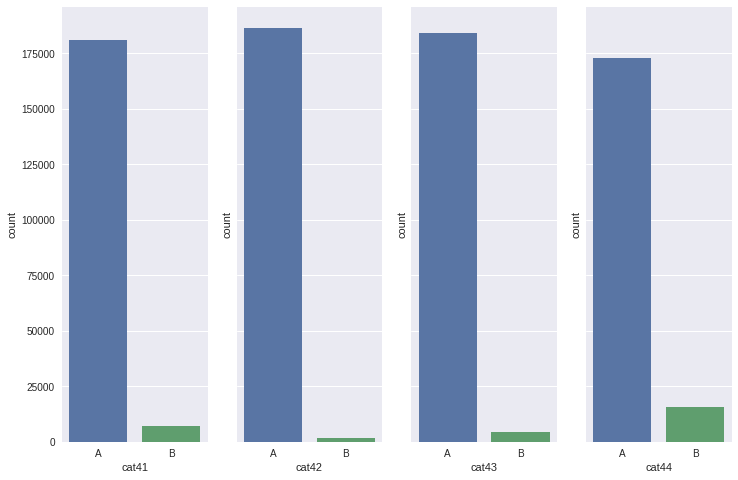

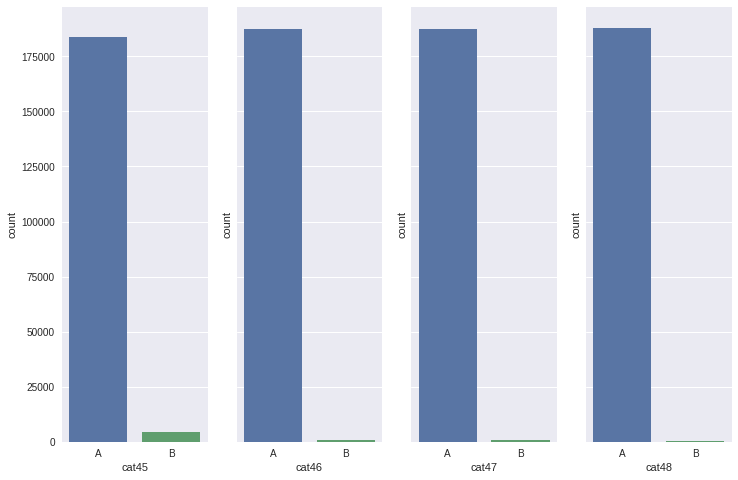

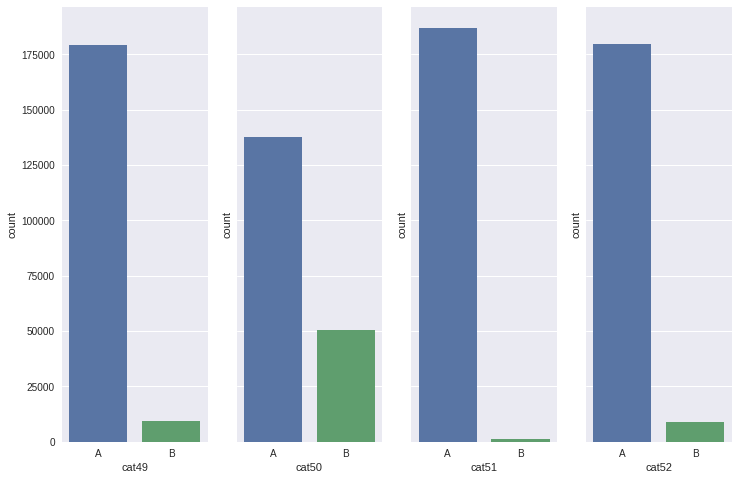

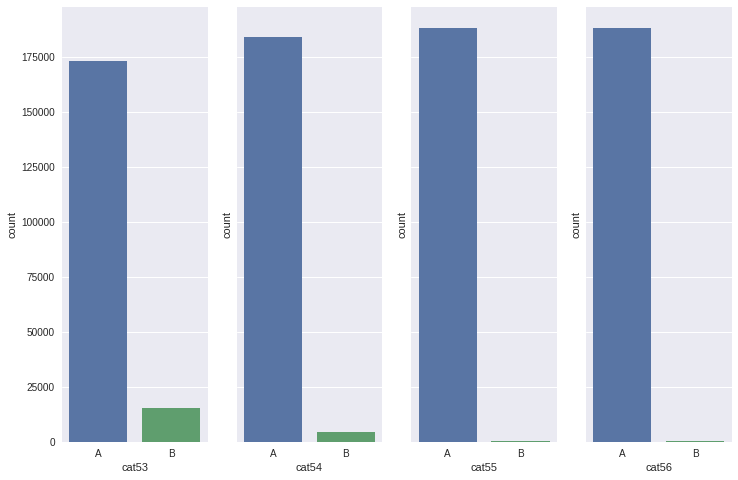

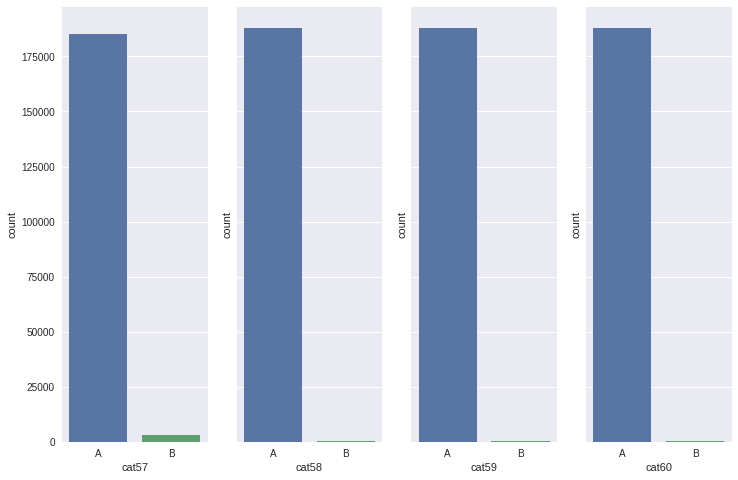

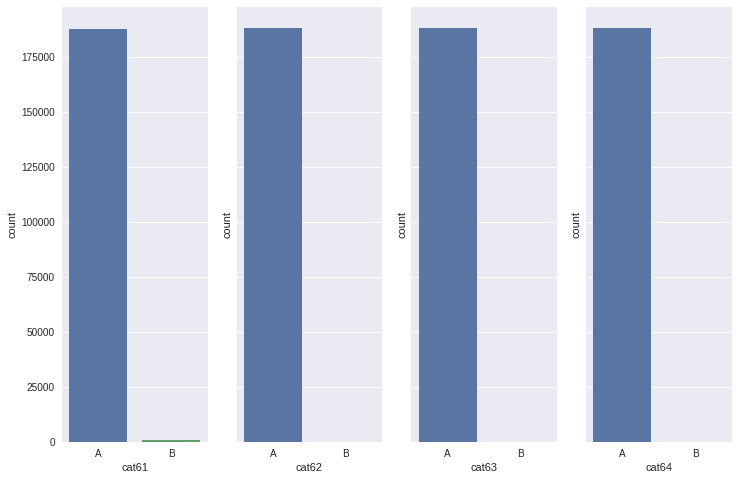

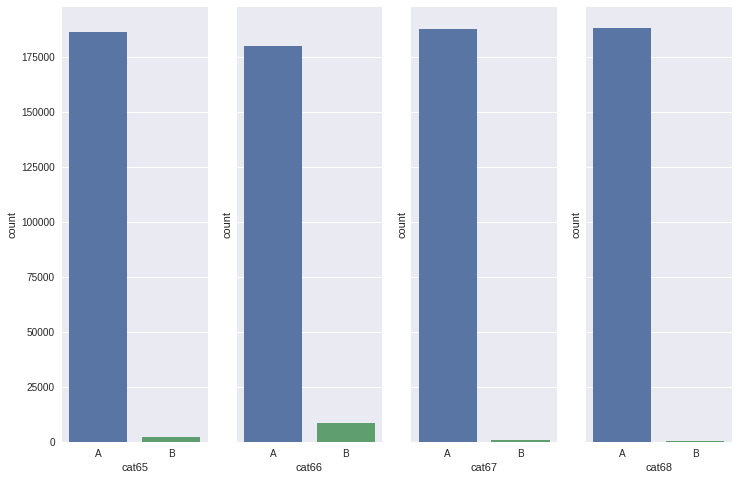

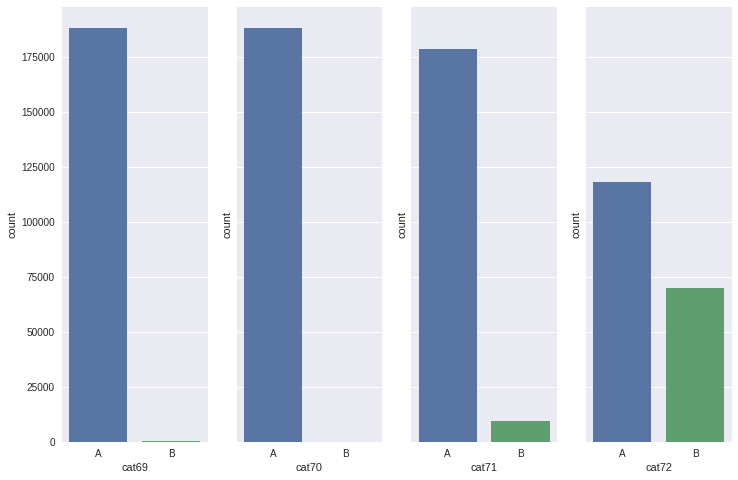

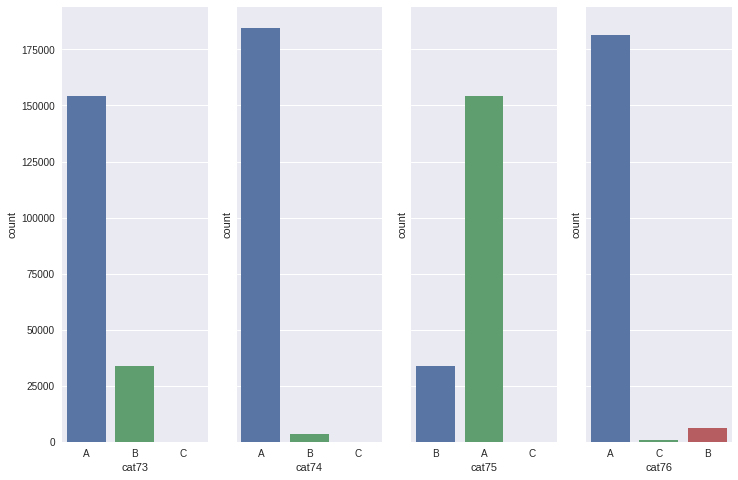

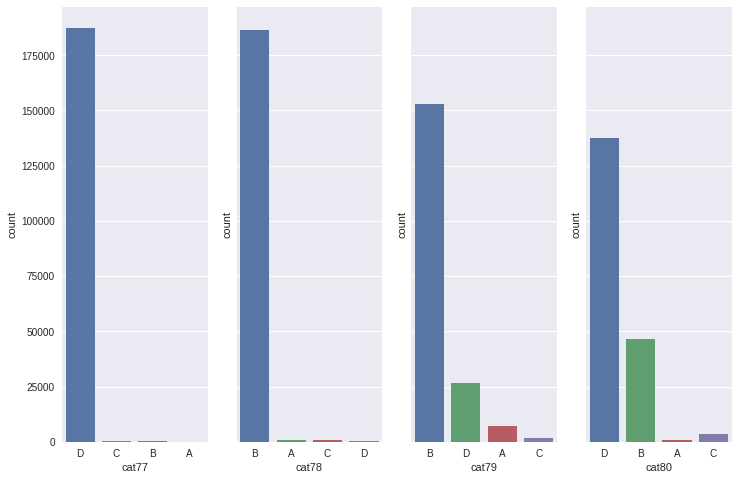

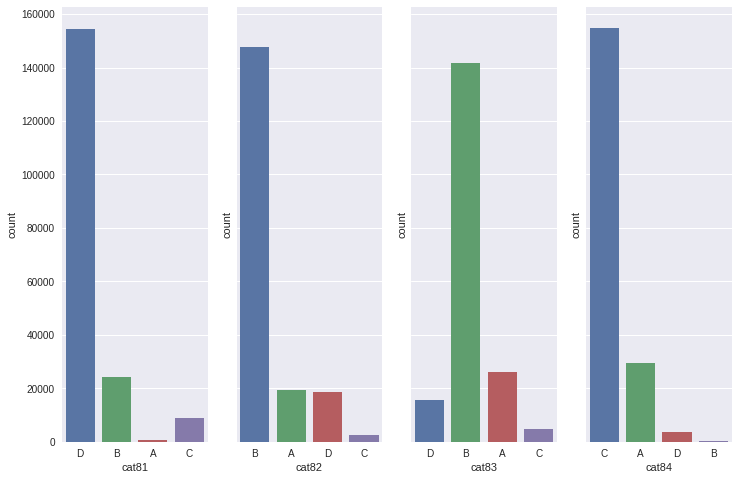

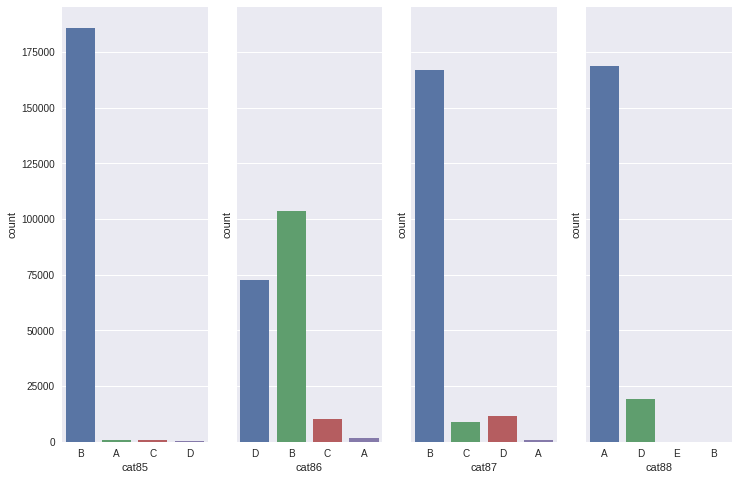

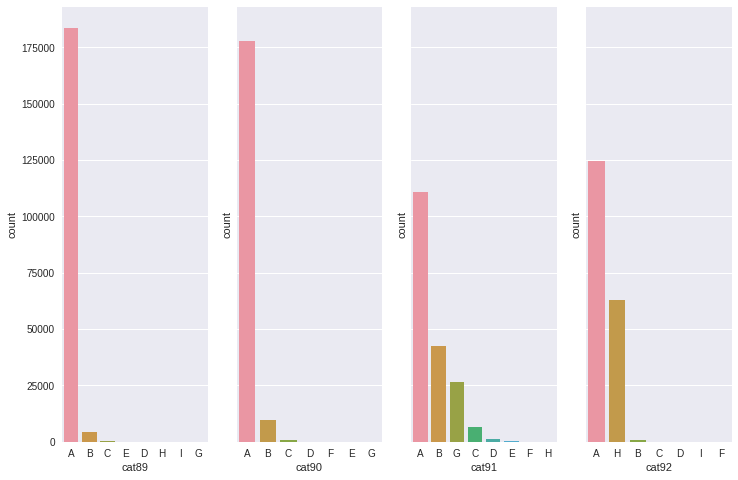

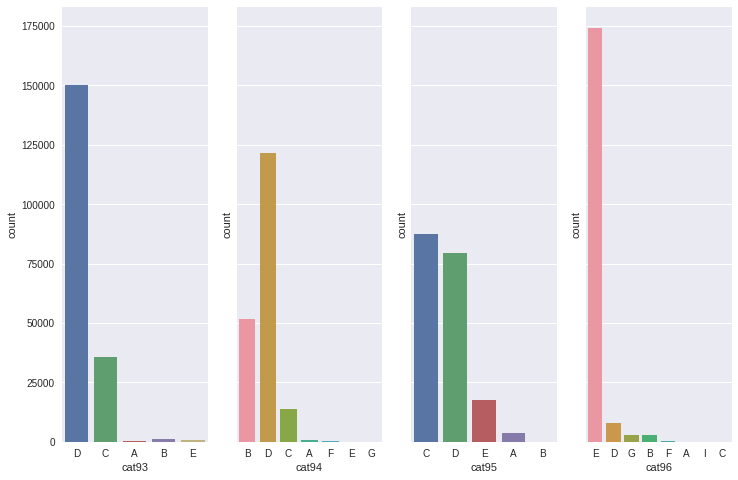

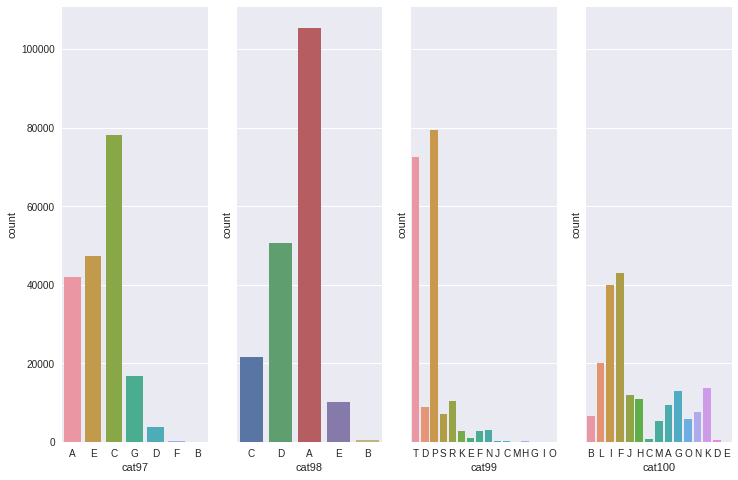

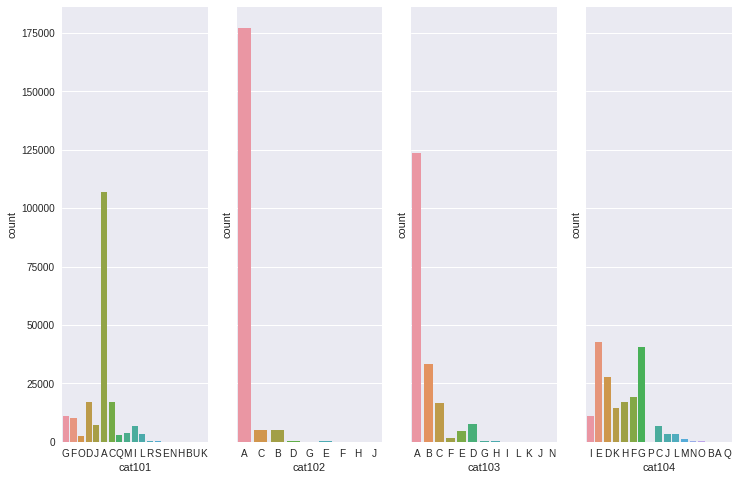

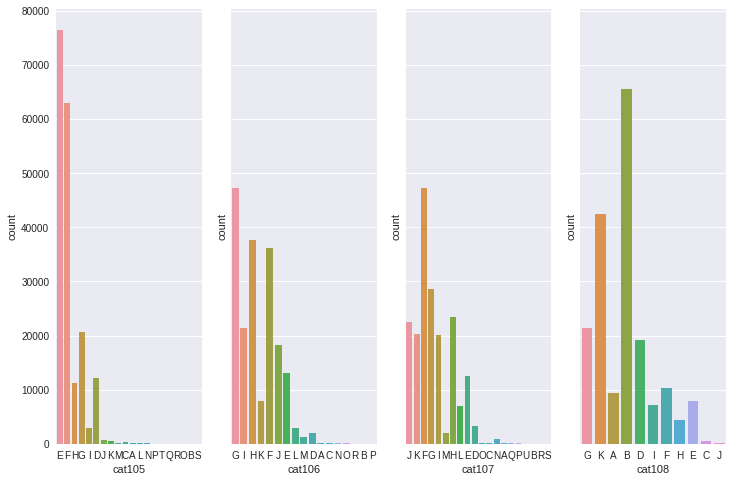

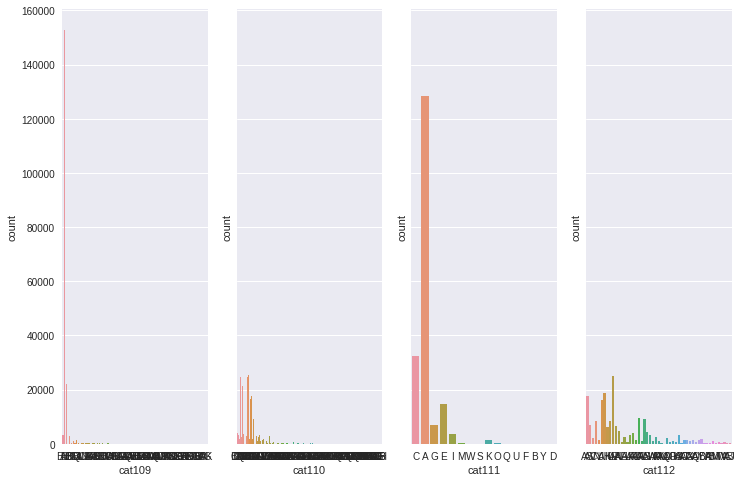

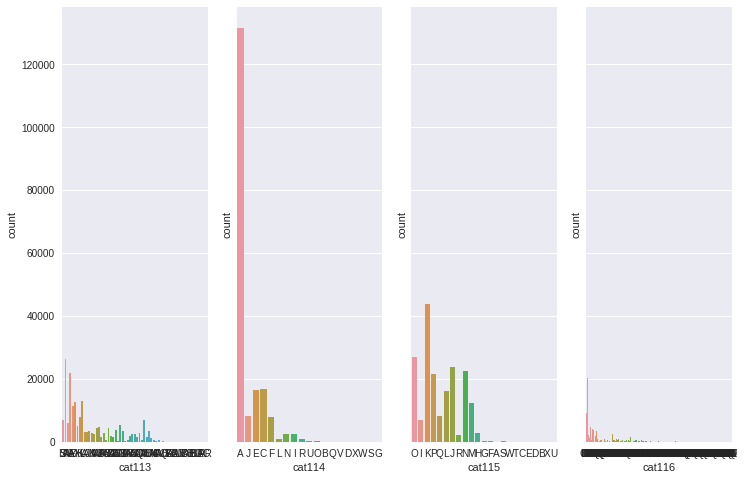

In [11]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12,8))
    for j in range(n_cols):
        sns.countplot(x=feature_cols[i*n_cols+j], data=data, ax=ax[j])

'''
1  - 72  have 2 labels A and B
73 - 76  have 3 labels A,B, and C
77 - 87  have 4 labels A,V,C, and D
88       A, B, D, E
89 - 108 more labels
109- 116 many labels
'''

Pre-processing Data - One Hot Encoding

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#X_all = data[feature_cols]
#y_all = data[target_cols]
data.drop('id',axis=1,inplace=True)
data_test.drop('id',axis=1,inplace=True)
print 'training data shape before encoding'
print data.shape

labels = []

for i in range(0,116):
    train = data[feature_cols[i]].unique()
    test = dataset_test[feature_cols[i]].unique()
    labels.append(list(set(train)|set(test)))    

del dataset_test
#print labels

#One hot encode all categorical attributes
cats = []
for i in range(0,116):
    #Label encode
    le = LabelEncoder()
    le.fit(labels[i])
    #print labels[i]
    #print data.iloc[:,i]
    feature = le.transform(data.iloc[:,i])
    feature = feature.reshape(data.shape[0], 1)
    #One hot encode
    enc = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = enc.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

#Concatenate encoded attributes with continuous attributes
dataset_encoded = np.concatenate((encoded_cats,data.iloc[:,116:].values),axis=1)
#testset_encoded = np.concatenate((encoded_cats,data_test.iloc[:,116:].values),axis=1)

del cats
del feature
del data
del data_test
del encoded_cats
print(dataset_encoded.shape)
print(testset_encoded.shape)

training data shape before encoding
(188318, 131)
(188318, 1139)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

# split data

In [ ]:
row, col = dataset_encoded.shape

X_all = dataset_encoded[:,0:(col-1)]
y_all = dataset_encoded[:,(col-1)]

del dataset_encoded

from sklearn import cross_validation
X_train, X_label, y_train, y_label = cross_validation.train_test_split(X_all, y_all, test_size=0.2, random_state=0)

print 'finish train test split'


# training models


In [38]:
del X_train, X_label, y_train, y_label

In [ ]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression(n_jobs=-1)
